In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error

In [2]:
#Pulling data from file
data = open(r"C:\\Users\\tatem\\python_examples\\eua-dataset\\edge-servers\\site.csv")
my_df = pd.read_csv(data)
my_df

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2
0,1000,-12.471947,130.845073,Fort Hill Wharf DARWIN,NT,4,800.0,Unknown,NaN,GO7H
1,10000,-33.756158,150.698182,Cnr Castlereagh & Lethbri PENRITH,NSW,2,2750.0,Unknown,NaN,MV9O
2,10000002,-28.777660,114.634260,Optus 50m Lattice Tower 71 Eastward Road Utakarra,WA,4,NaN,Within 10 meters,NaN,AU3O
3,10000003,-12.464597,130.840708,6 Knuckey Street Darwin,NT,4,NaN,Within 10 meters,NaN,GO7H
4,10000004,-39.596400,143.933900,Cape Wickham Links Clubhouse KING ISLAND,TAS,5,NaN,Within 100 meters,NaN,KX8L
...,...,...,...,...,...,...,...,...,...,...
95557,9989,-33.752425,150.696231,114-116 Henry St Rds PENRITH,NSW,2,2750.0,Within 10 meters,NaN,MV9O
95558,9993,-33.730815,150.697780,5 Andrews Rd PENRITH,NSW,2,2750.0,Unknown,NaN,MV9K
95559,9995,-33.752834,150.698811,CMTS Site 90-92 Henry St PENRITH,NSW,2,2750.0,Within 10 meters,39.0,MV9O
95560,9997,-33.750361,150.696718,Railway Station Belmore St PENRITH,NSW,2,2750.0,Unknown,35.0,MV9O


In [3]:
#Just to make sure column names are correct and make them case sensitive before we start cleaning data
my_df.columns = my_df.columns.str.strip()
print(my_df.head())
print(my_df.columns)

    SITE_ID   LATITUDE   LONGITUDE  \
0      1000 -12.471947  130.845073   
1     10000 -33.756158  150.698182   
2  10000002 -28.777660  114.634260   
3  10000003 -12.464597  130.840708   
4  10000004 -39.596400  143.933900   

                                                NAME STATE  LICENSING_AREA_ID  \
0                             Fort Hill Wharf DARWIN    NT                  4   
1                  Cnr Castlereagh & Lethbri PENRITH   NSW                  2   
2  Optus 50m Lattice Tower 71 Eastward Road Utakarra    WA                  4   
3                            6 Knuckey Street Darwin    NT                  4   
4           Cape Wickham Links Clubhouse KING ISLAND   TAS                  5   

   POSTCODE     SITE_PRECISION  ELEVATION HCIS_L2  
0     800.0            Unknown        NaN    GO7H  
1    2750.0            Unknown        NaN    MV9O  
2       NaN   Within 10 meters        NaN    AU3O  
3       NaN   Within 10 meters        NaN    GO7H  
4       NaN  Within 100 

In [4]:
#Checking data-type of my data
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95562 entries, 0 to 95561
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SITE_ID            95562 non-null  int64  
 1   LATITUDE           95562 non-null  float64
 2   LONGITUDE          95562 non-null  float64
 3   NAME               95562 non-null  object 
 4   STATE              95271 non-null  object 
 5   LICENSING_AREA_ID  95562 non-null  int64  
 6   POSTCODE           85914 non-null  float64
 7   SITE_PRECISION     95560 non-null  object 
 8   ELEVATION          24462 non-null  float64
 9   HCIS_L2            95207 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 7.3+ MB


In [5]:
# Drop rows with 'Unknown' in the 'SITE_PRECISION' column
my_df = my_df[my_df['SITE_PRECISION'] != 'Unknown']

In [6]:
# drop rows with NaN in the stipulated column
my_df = my_df.dropna(subset=['POSTCODE', 'ELEVATION', 'SITE_PRECISION',
                             'SITE_ID'])

#dropping redudant columns
my_df = my_df.drop("NAME", axis=1)
my_df = my_df.drop("HCIS_L2", axis=1)
my_df = my_df.drop("STATE", axis=1)

In [7]:
my_df

,SITE_ID,LATITUDE,LONGITUDE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION
95,100001,-38.248652,144.605442,2,3222.0,Within 100 meters,23.0
192,100002,-37.728550,145.222007,2,3113.0,Within 10 meters,116.0
634,10000668,-33.132040,148.181500,4,2870.0,Within 10 meters,362.0
666,100007,-41.210755,146.327361,4,7310.0,Within 10 meters,206.0
1054,100011,-41.144326,146.078107,4,7316.0,Within 10 meters,235.0
...,...,...,...,...,...,...,...
95548,9970,-35.029117,144.044929,4,2733.0,Within 100 meters,75.0
95549,9971,-35.099663,143.529008,4,3585.0,Within 100 meters,60.0
95550,9972,-35.332614,143.612642,4,3585.0,Within 100 meters,71.0
95553,9980,-33.754568,150.716963,2,2747.0,Within 10 meters,48.0


In [8]:
# MAKE STATE VALUES INTO BIBNARY (for machine language)
my_df = pd.get_dummies(my_df,columns=['SITE_PRECISION'])
my_df

,SITE_ID,LATITUDE,LONGITUDE,LICENSING_AREA_ID,POSTCODE,ELEVATION,SITE_PRECISION_Within 10 meters,SITE_PRECISION_Within 100 meters
95,100001,-38.248652,144.605442,2,3222.0,23.0,0,1
192,100002,-37.728550,145.222007,2,3113.0,116.0,1,0
634,10000668,-33.132040,148.181500,4,2870.0,362.0,1,0
666,100007,-41.210755,146.327361,4,7310.0,206.0,1,0
1054,100011,-41.144326,146.078107,4,7316.0,235.0,1,0
...,...,...,...,...,...,...,...,...
95548,9970,-35.029117,144.044929,4,2733.0,75.0,0,1
95549,9971,-35.099663,143.529008,4,3585.0,60.0,0,1
95550,9972,-35.332614,143.612642,4,3585.0,71.0,0,1
95553,9980,-33.754568,150.716963,2,2747.0,48.0,1,0


In [9]:
#checking my new index names
print(my_df.columns)

Index(['SITE_ID', 'LATITUDE', 'LONGITUDE', 'LICENSING_AREA_ID', 'POSTCODE',
       'ELEVATION', 'SITE_PRECISION_Within 10 meters',
       'SITE_PRECISION_Within 100 meters'],
      dtype='object')


In [10]:
#Data should be split into features(used to train) & target (what we are training) variables
x = my_df[['LATITUDE', 'LONGITUDE', 'LICENSING_AREA_ID', 'POSTCODE']]
y = my_df[['SITE_PRECISION_Within 10 meters', 
           'SITE_PRECISION_Within 100 meters', 'ELEVATION']]

In [11]:
                                     #TRAINING THE MLP MODEL

#TRAIN TEST SPLITTING (Using the SKlearn lib)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)

#Drop rows with NaN 
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]

x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#MLP REGRESSOR
MLP = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu',
                   max_iter=2000, learning_rate_init=0.001, random_state=42)

#model training
MLP.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)

In [12]:
#MODEL IS WORK WELL !! ME IS HAPPY...2AM, TIME TO SLEEEP.

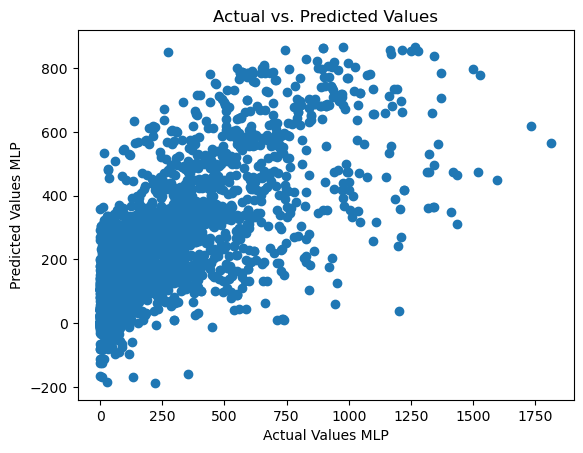

In [13]:
# Wait, Lets visualize the results. Using scatter plot
ya = y_test
yp = MLP.predict(x_test)


plt.scatter(ya, yp)
plt.xlabel("Actual Values MLP")
plt.ylabel("Predicted Values MLP")
plt.title("Actual vs. Predicted Values")
plt.show()

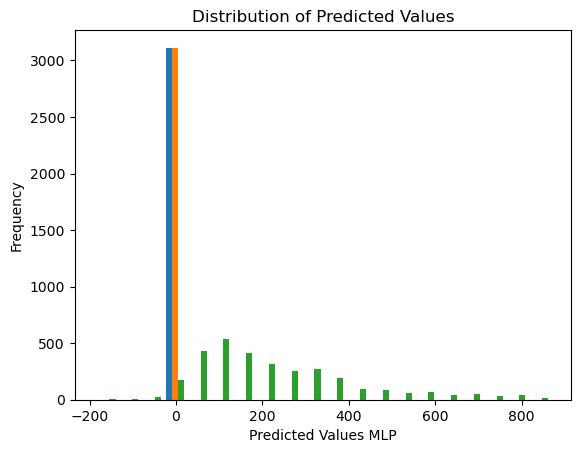

In [14]:
#Histogram 

ya = y_test
yp = MLP.predict(x_test)

plt.hist(yp, bins=20)  # You can adjust the number of bins as needed
plt.xlabel("Predicted Values MLP")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Values")
plt.show()

In [15]:
# Make predictions using the MLP regressor
y_pred = MLP.predict(x_test)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MLP):", MAE)

Mean Absolute Error (MLP): 40.5462949802853


In [16]:
                                        #TRAINING KNN MODEL 
from sklearn.neighbors import KNeighborsClassifier 

#Training model
KNN = KNeighborsClassifier(n_neighbors=3) #k-value = 3
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#Predictions
y_pred_knn = KNN.predict(x_test)

#  Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error (KNN):", MAE)

Mean Absolute Error (KNN): 21.385818337617824


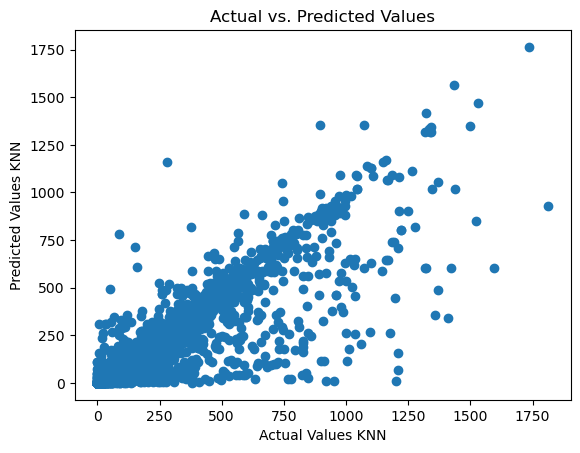

In [18]:
ya_KNN = y_test
yp_KNN = KNN.predict(x_test)


plt.scatter(ya_KNN , yp_KNN)
plt.xlabel("Actual Values KNN")
plt.ylabel("Predicted Values KNN")
plt.title("Actual vs. Predicted Values")
plt.show()

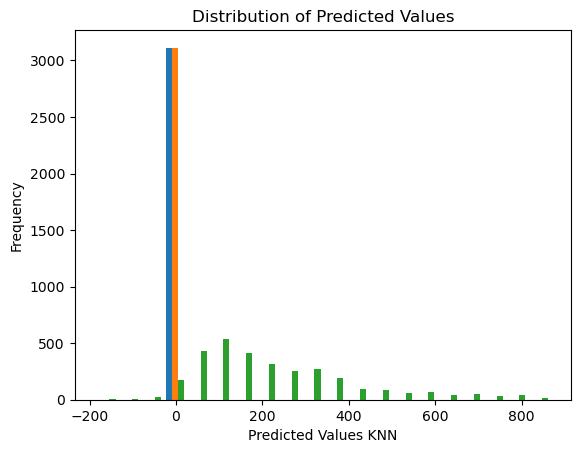

In [19]:
#Histogram

ya = y_test
yp = MLP.predict(x_test)

plt.hist(yp, bins=20) 
plt.xlabel("Predicted Values KNN")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Values")
plt.show()